# Cat and Dog Classification using SVM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from skimage.io import imread
from skimage.transform import resize

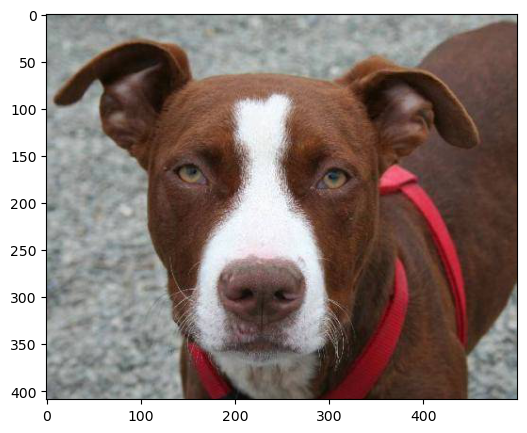

In [4]:
plt.figure(figsize=(10,5))
img1 = r"C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\dogs\dog.4126.jpg"
plt.imshow(imread(img1))

In [6]:
img_path = r"C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\dogs\dog.4126.jpg"
img = imread(img_path)
img

array([[[119, 131, 129],
        [122, 134, 132],
        [125, 137, 135],
        ...,
        [164, 169, 173],
        [167, 172, 176],
        [170, 175, 179]],

       [[122, 134, 132],
        [125, 137, 135],
        [128, 140, 138],
        ...,
        [165, 170, 173],
        [167, 172, 175],
        [169, 174, 177]],

       [[126, 136, 135],
        [129, 139, 138],
        [132, 142, 141],
        ...,
        [165, 171, 171],
        [165, 171, 171],
        [166, 172, 172]],

       ...,

       [[128, 131, 136],
        [129, 132, 137],
        [131, 134, 139],
        ...,
        [125, 144, 150],
        [127, 146, 152],
        [128, 147, 153]],

       [[134, 137, 142],
        [136, 139, 144],
        [138, 141, 146],
        ...,
        [122, 142, 149],
        [123, 143, 150],
        [124, 144, 151]],

       [[144, 147, 152],
        [142, 145, 150],
        [139, 142, 147],
        ...,
        [127, 147, 156],
        [126, 146, 155],
        [125, 145, 154]]

In [8]:
img.shape

(409, 500, 3)

In [10]:
img_resize = resize(img, (15,15))
img_resize.shape

(15, 15, 3)

In [12]:
img_resize

array([[[0.56072863, 0.58731908, 0.58189553],
        [0.55873752, 0.57556739, 0.57003599],
        [0.55559424, 0.56040174, 0.54829273],
        [0.55878943, 0.56679558, 0.5509975 ],
        [0.5949554 , 0.61501016, 0.6067921 ],
        [0.59989699, 0.62612161, 0.61572482],
        [0.61547985, 0.64023001, 0.63029649],
        [0.59910298, 0.6196401 , 0.60902603],
        [0.62013483, 0.64326343, 0.63920522],
        [0.6333755 , 0.65646456, 0.65192613],
        [0.61247527, 0.63346882, 0.6264491 ],
        [0.61978232, 0.6377696 , 0.63197018],
        [0.61099559, 0.61661001, 0.60736989],
        [0.56118369, 0.52729156, 0.50477125],
        [0.49438304, 0.42848649, 0.40063917]],

       [[0.58041923, 0.60599079, 0.59491415],
        [0.48406482, 0.46415847, 0.4338603 ],
        [0.29807629, 0.24880537, 0.21186637],
        [0.306663  , 0.2469937 , 0.20718278],
        [0.51374009, 0.47639182, 0.44735878],
        [0.63115349, 0.64504142, 0.63579586],
        [0.63868393, 0.6567839 ,

In [14]:
flatten_img = img_resize.flatten()
flatten_img

array([0.56072863, 0.58731908, 0.58189553, 0.55873752, 0.57556739,
       0.57003599, 0.55559424, 0.56040174, 0.54829273, 0.55878943,
       0.56679558, 0.5509975 , 0.5949554 , 0.61501016, 0.6067921 ,
       0.59989699, 0.62612161, 0.61572482, 0.61547985, 0.64023001,
       0.63029649, 0.59910298, 0.6196401 , 0.60902603, 0.62013483,
       0.64326343, 0.63920522, 0.6333755 , 0.65646456, 0.65192613,
       0.61247527, 0.63346882, 0.6264491 , 0.61978232, 0.6377696 ,
       0.63197018, 0.61099559, 0.61661001, 0.60736989, 0.56118369,
       0.52729156, 0.50477125, 0.49438304, 0.42848649, 0.40063917,
       0.58041923, 0.60599079, 0.59491415, 0.48406482, 0.46415847,
       0.4338603 , 0.29807629, 0.24880537, 0.21186637, 0.306663  ,
       0.2469937 , 0.20718278, 0.51374009, 0.47639182, 0.44735878,
       0.63115349, 0.64504142, 0.63579586, 0.63868393, 0.6567839 ,
       0.64364858, 0.63355994, 0.65329259, 0.64071567, 0.63763216,
       0.66015682, 0.64946544, 0.62480231, 0.6323142 , 0.61323

In [16]:
flatten_img.shape

(675,)

In [18]:
input_dir = r"C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set"
categories = ['cats', 'dogs']
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img, (15,15))
        data.append(img.flatten())
        labels.append(category_idx)    

C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4001.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4002.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4003.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4004.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4005.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4006.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4007.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4008.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4009.jpg
C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\cats\cat.4010.jpg
C:\Users\Shreyash Mu

In [12]:
data[1]

array([0.49455462, 0.47324773, 0.41558664, 0.45957313, 0.43882891,
       0.38971449, 0.41111226, 0.39087506, 0.3461367 , 0.3630406 ,
       0.34698436, 0.29728408, 0.33814475, 0.32099151, 0.26820247,
       0.31767968, 0.29854113, 0.2488929 , 0.3421934 , 0.30706556,
       0.2337422 , 0.32739275, 0.2909316 , 0.21318212, 0.36564255,
       0.30681663, 0.19717932, 0.39938465, 0.31329991, 0.20244296,
       0.2883319 , 0.17946126, 0.11067593, 0.25332802, 0.11285275,
       0.06189   , 0.31054545, 0.1236155 , 0.06311208, 0.38024043,
       0.14822041, 0.06471173, 0.43458196, 0.17865577, 0.07205226,
       0.45319641, 0.43605161, 0.39145746, 0.3172191 , 0.29110996,
       0.24906743, 0.33631071, 0.30687378, 0.26106138, 0.33135962,
       0.28061787, 0.22752954, 0.30041331, 0.22811592, 0.16582358,
       0.29824276, 0.22449296, 0.16420037, 0.31055359, 0.23620151,
       0.17118621, 0.31253266, 0.24385358, 0.1785885 , 0.32762486,
       0.23005999, 0.15850833, 0.35299655, 0.19097144, 0.10531

In [13]:
labels[1]

0

In [14]:
data = np.asarray(data)
labels = np.asarray(labels)

In [15]:
data

array([[0.46755839, 0.58850872, 0.64166042, ..., 0.51180898, 0.57395315,
        0.60879013],
       [0.49455462, 0.47324773, 0.41558664, ..., 0.40109402, 0.17392738,
        0.07247091],
       [0.19554549, 0.17977376, 0.14617667, ..., 0.57303258, 0.50758547,
        0.48239942],
       ...,
       [0.47520526, 0.40143693, 0.33460227, ..., 0.50795487, 0.45401593,
        0.39587101],
       [0.54887027, 0.54875902, 0.5450321 , ..., 0.59782689, 0.62642054,
        0.6067121 ],
       [0.95148657, 0.95150596, 0.94981638, ..., 0.10356239, 0.10356627,
        0.09573779]])

In [16]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# Built SVM Model for classification

In [20]:
from sklearn.svm import SVC
svm_model = SVC()

### Model Training

In [22]:
svm_model.fit(x_train, y_train)

SVC()

In [23]:
y_pred = svm_model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [24]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.6395061728395062

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(svm_model, data, labels, cv = 5)
cross_val_score

array([0.58518519, 0.60987654, 0.64444444, 0.66089109, 0.64356436])

In [26]:
Mean_Accuracy = cross_val_score.mean()
Mean_Accuracy

0.628792323676812

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       202
           1       0.62      0.71      0.66       203

    accuracy                           0.64       405
   macro avg       0.64      0.64      0.64       405
weighted avg       0.64      0.64      0.64       405



In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
classifer = SVC()
parameters = [{'gamma':[0.01, 0.001, 0.0001], 'C':[10, 100, 1000]}]
grid_search = GridSearchCV(classifer, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [30]:
best_estimator = grid_search.best_estimator_
best_estimator

SVC(C=10, gamma=0.01)

In [31]:
y_prediction = best_estimator.predict(x_test)
y_prediction

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

# Classify the Image

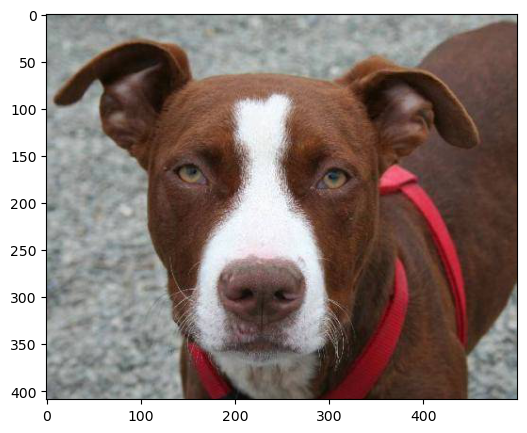

In [33]:
plt.figure(figsize=(10, 5))
img_path = r"C:\Users\Ishwari\Downloads\test_set\test_set\dogs\dog.5000.jpg"
plt.imshow(imread(img1))

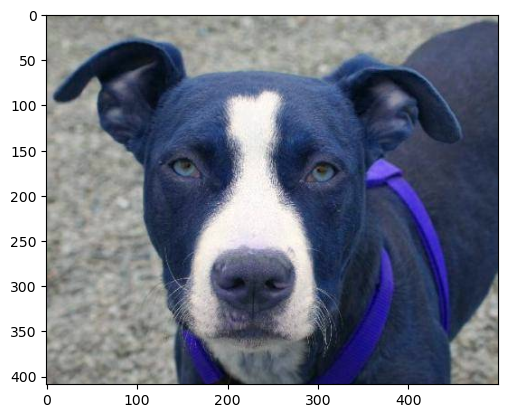

In [34]:
import cv2 as cv
img_path = cv.imread(img1)
plt.imshow(img_path)

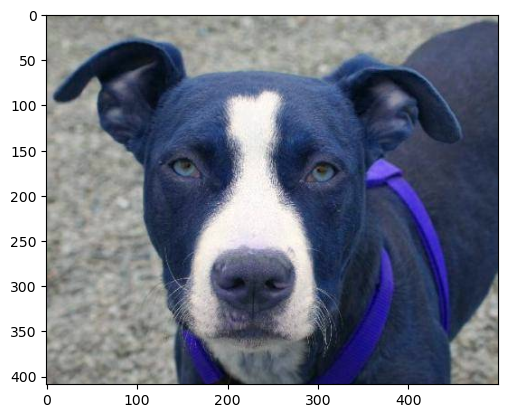

In [35]:
img_dog = r"C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\dogs\dog.4126.jpg"
img_path = cv.imread(img_dog)
plt.imshow(img_path)

In [36]:
img_dog = r"C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\dogs\dog.4126.jpg"
img_new = imread(img_dog)
img_new1 = resize(img_new, (15,15))
img_flatten = img_new1.flatten()
img_array = np.asarray(img_flatten)

result = svm_model.predict(img_array.reshape(1, -1))

if result[0] == 1:
    print("Result =", result[0])
    print("It is a dog.")
else:
    print("It is a cat.")

Result = 1
It is a dog.


In [37]:
def image_classification_prediction(image):
    img_new = imread(image)
    img_new1 = resize(img_new, (15,15))
    img_flatten = img_new1.flatten()
    img_array = np.asarray(img_flatten)
    result = svm_model.predict(img_array.reshape(1, -1))
    img_path = cv.imread(image)
    plt.imshow(img_path)
    if result[0] == 1:
        print("Result =", result[0])
        return "It is a dog"
    else:
        return "IT is a cat"
        

Result = 1


'It is a dog'

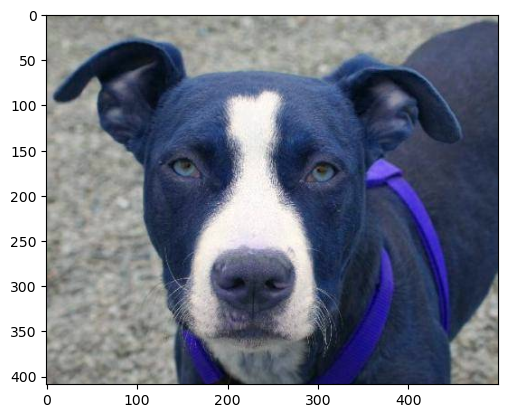

In [38]:
img2 = r"C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\dogs\dog.4126.jpg"
image_classification_prediction(img2)

Result = 1


'It is a dog'

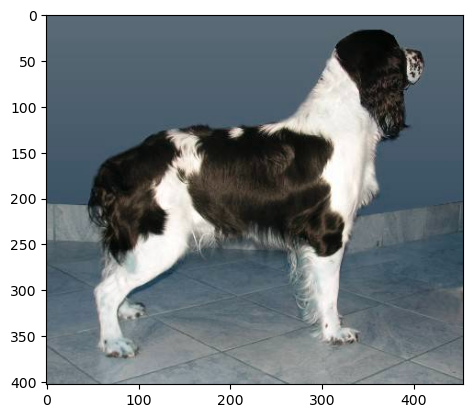

In [39]:
img3 = r"C:\Users\Shreyash Musmade\Desktop\prodigy\Task 3\dogs-vs-cats\test_set\test_set\dogs\dog.4005.jpg"
image_classification_prediction(img3)